In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import pandas as pd

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})


In [2]:
data0 = pd.DataFrame(read_csv('Ntrain1.csv')[0:6000],dtype=float)
data6 = pd.DataFrame(read_csv('Ftrain6.csv')[0:6000],dtype=float)
data8 = pd.DataFrame(read_csv('Ftrain8.csv')[0:6000],dtype=float)
data18 = pd.DataFrame(read_csv('Ftrain18.csv')[0:6000],dtype=float)
label = pd.DataFrame({'label':[0 for _ in range(len(data6))]})
index = pd.DataFrame({'index':[x for x in range(len(data6))]})

data0['CprPower'] = data0['CprPower']/1000
data6['CprPower'] = data6['CprPower']/1000
data8['CprPower'] = data8['CprPower']/1000
data18['CprPower'] = data18['CprPower']/1000

xdata0 = index.join(data0).join(label)
xdata6 = index.join(data6).join(label)
xdata8 = index.join(data8).join(label)
xdata18 = index.join(data18).join(label)



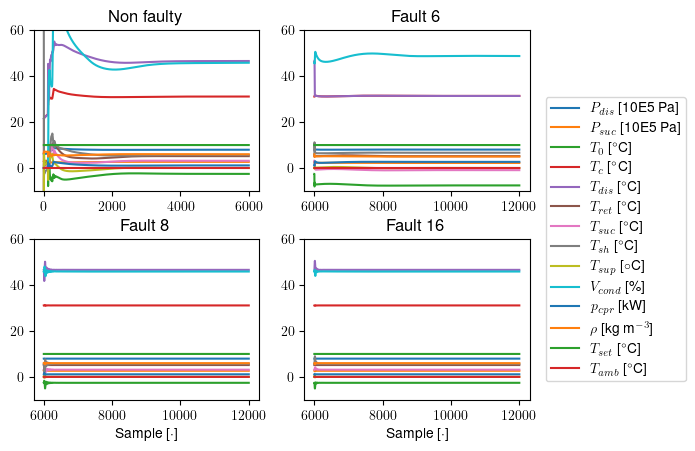

In [23]:

ran = [0,6000]

fig, axs = plt.subplots(2,2)

fig.subplots_adjust(wspace=0.2,hspace=0.3)

for i in xdata0.drop('index',axis=1).drop('label',axis=1):
    axs[0][0].plot(xdata0['index'][ran[0]:ran[1]],xdata0[i][ran[0]:ran[1]])
    axs[0][1].plot(xdata6['index'][ran[0]:ran[1]]+6000,xdata6[i][ran[0]:ran[1]])
    axs[1][0].plot(xdata8['index'][ran[0]:ran[1]]+6000,xdata8[i][ran[0]:ran[1]])
    axs[1][1].plot(xdata18['index'][ran[0]:ran[1]]+6000,xdata18[i][ran[0]:ran[1]])
plt.legend([r'$P_{dis}$ [10E5 Pa]',r'$P_{suc}$ [10E5 Pa]',r'$T_0$ [$^\circ$C]',r'$T_c$ [$^\circ$C]',r'$T_{dis}$ [$^\circ$C]',r'$T_{ret}$ [$^\circ$C]',r'$T_{suc}$ [$^\circ$C]',r'$T_{sh}$ [$^\circ$C]',r'$T_{sup}$ [$\circ$C]',r'$V_{cond}$ [\%]',r'$p_{cpr}$ [kW]',r'$\rho$ [kg m$^{-3}$]',r'$T_{set}$ [$^\circ$C]',r'$T_{amb}$ [$^\circ$C]'], bbox_to_anchor=(1.04, 1), loc="center left")

axs[0][0].set_title("Non faulty")
axs[0][1].set_title("Fault 6")
axs[1][0].set_title("Fault 8")
axs[1][1].set_title("Fault 16")

axs[1][0].set(xlabel='Sample [$\cdot$]')
axs[1][1].set(xlabel='Sample [$\cdot$]')

axs[0][0].set_ylim([-10, 60])
axs[0][1].set_ylim([-10, 60])
axs[1][0].set_ylim([-10, 60])
axs[1][1].set_ylim([-10, 60])
#plt.show()
plt.savefig('modelFig.pdf',bbox_inches="tight")
